Inputs

In [1]:
# =========================================
# For accessing directories
# =========================================

#root_dir = "/local/data/artemis/workspace/vbennington/SOCAT_ML/dpco2/no_atm_seasonality/smooth_climate_indices"
root_dir = "/local/data/artemis/workspace/vbennington/SOCAT_ML/pCO2_DIC_Taka"
data_output_dir = f"{root_dir}/data/processed"
reference_output_dir = f"{root_dir}/references"



Modules


In [4]:
# standard imports
import os
import datetime
from pathlib import Path
from collections import defaultdict
import scipy
import random
import numpy as np
import xarray as xr
import pandas as pd
import joblib
import pickle

# machine learning libraries
from sklearn.model_selection import train_test_split

# Python file with supporting functions
import pre_SOCAT

Predefined Values

In [5]:
# Loading references


In [5]:
# =========================================
# Setting the date range to unify the date type
# =========================================

# Define date range
date_range_start = '1982-01-01T00:00:00.000000000'
#date_range_start = '1990-01-01T00:00:00.000000000'
date_range_end = '2019-12-31T00:00:00.000000000'

# create date vector
dates = pd.date_range(start=date_range_start, 
                      end=date_range_end,freq='MS') + np.timedelta64(14, 'D')

# Select the start and end
date_start = dates[0]
date_end = dates[-1]
print(date_start)
print(len(dates))

1982-01-15 00:00:00
456


Loop to load in data, clean it, and save it

In [6]:

print(datetime.datetime.now())

df = pre_SOCAT.create_inputs(dates,12)
#df = pre_SOCAT.create_pco2_inputs(dates,12)

# Save the pandas data frame to my workspace
pre_SOCAT.save_clean_data(df, data_output_dir)

print(datetime.datetime.now())

2021-07-26 20:37:03.724327
Starting data saving process
Save complete
2021-07-26 20:38:32.960003


In [9]:
# Look at the data to make sure it looks okay:
df = pd.read_pickle(f'{data_output_dir}/data_clean_2D_mon_1x1_198201-201912.pkl')

In [10]:
DS=df.to_xarray()

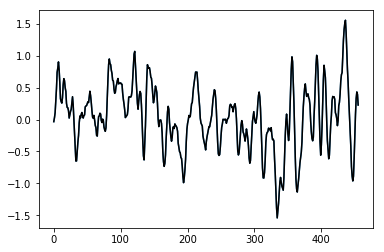

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(DS['nao'][:,70,90])
plt.plot(DS['nao'][:,70,90],color='black')

In [12]:
print(np.nanmean(df['pCO2_DIC'])-3*np.nanstd(df['pCO2_DIC']),np.nanmean(df['pCO2_DIC'])+3*np.nanstd(df['pCO2_DIC']))

-126.17653877481591 134.4335506511324
